In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [80]:
df = pd.read_csv('/content/chatgpt_reviews.csv')

In [81]:
df.head()

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


In [82]:
df.columns


Index(['Review Id', 'Review', 'Ratings', 'Review Date'], dtype='object')

In [83]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Review Id    196727 non-null  object
 1   Review       196721 non-null  object
 2   Ratings      196727 non-null  int64 
 3   Review Date  196727 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.0+ MB


In [84]:
df.describe()


,Ratings
count,196727.000000
mean,4.503535
std,1.083004
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


###DATA CLEANING


In [85]:
df.isnull().sum()


,0
Review Id,0
Review,6
Ratings,0
Review Date,0


In [86]:
df = df.dropna()

In [87]:
df.isnull().sum()


,0
Review Id,0
Review,0
Ratings,0
Review Date,0


In [88]:
df = df.drop_duplicates(subset=['Review Id'])


###DATE & TIME ANALYSIS


In [89]:
df['Review Date'] = pd.to_datetime(df['Review Date'], errors='coerce')


In [62]:
df['year'] = df['Review Date'].dt.year
df['month'] = df['Review Date'].dt.month
df['day'] = df['Review Date'].dt.day


In [63]:
df['year_month'] = df['Review Date'].dt.to_period('M')


###RATING ANALYSIS

In [64]:
df['Ratings'].value_counts()


,count
Ratings,
5,147808
4,22422
1,11741
3,7911
2,3266


In [65]:
df['Ratings'].value_counts(normalize=True) * 100


,proportion
Ratings,
5,76.525773
4,11.608715
1,6.078758
3,4.095823
2,1.690931


In [66]:
df.groupby('Ratings').size()


,0
Ratings,
1,11741
2,3266
3,7911
4,22422
5,147808


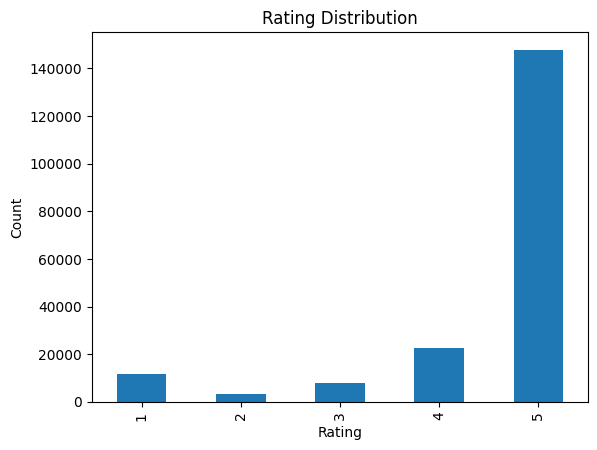

In [67]:
plt.figure()
df['Ratings'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Distribution")
plt.show()


###REVIEWS OVER TIME

In [68]:
df.groupby('year_month').size()


,0
year_month,
2023-07,8254
2023-08,6775
2023-09,7565
2023-10,5799
2023-11,8684
2023-12,10320
2024-01,9265
2024-02,8693
2024-03,15078


In [69]:
reviews_over_time = df.groupby('year_month').size()


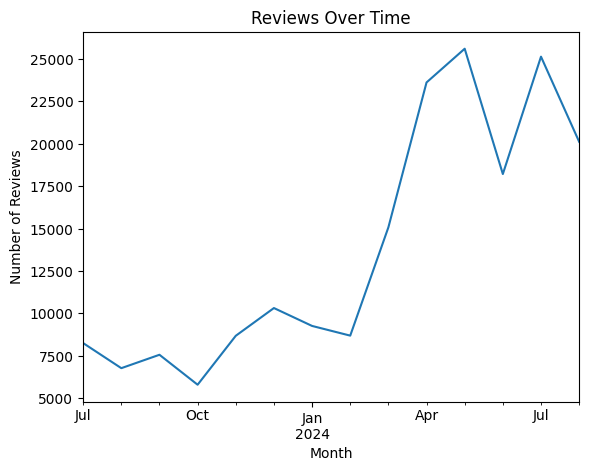

In [70]:
plt.figure()
reviews_over_time.plot()
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.title("Reviews Over Time")
plt.show()


###TEXT ANALYSIS

In [90]:
df['review_length'] = df['Review'].apply(len)


In [72]:
df[['Ratings', 'review_length']].head()


,Ratings,review_length
0,5,4
1,5,4
2,5,8
3,5,8
4,5,368


In [73]:
df.groupby('Ratings')['review_length'].mean()


,review_length
Ratings,
1,82.559833
2,96.503674
3,73.331311
4,58.767148
5,39.000751


###SENTIMENT ANALYSIS


In [74]:
def sentiment_label(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"


In [75]:
df['sentiment'] = df['Ratings'].apply(sentiment_label)


In [76]:
df['sentiment'].value_counts()


,count
sentiment,
Positive,170230
Negative,15007
Neutral,7911


In [77]:
df['sentiment'].value_counts(normalize=True) * 100


,proportion
sentiment,
Positive,88.134488
Negative,7.769690
Neutral,4.095823


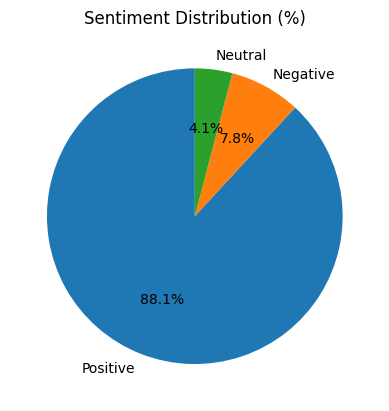

In [78]:
sentiment_pct = df['sentiment'].value_counts(normalize=True) * 100

plt.figure()
plt.pie(
    sentiment_pct,
    labels=sentiment_pct.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Sentiment Distribution (%)")
plt.show()
